In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) 

In [2]:
df = pd.read_csv('E:\Data analyst\Project\movies0.csv')
pd.set_option('display.min_rows', None)

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.dropna(inplace = True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
for colnames in df.columns:
    percent_missing = np.mean(df[colnames].isnull())
    print('{} - {}%'.format(colnames, percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
df['released'].str.split('[(,\s)]{1}').str[3]
df['released'] = df['released'].astype(str)
df['yearcorrect'] = df['released'].str.extract(pat = '(0-9){4}').astype('str')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,nan
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,nan
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,nan
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,nan
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,nan


In [9]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,nan
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,nan
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,nan
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,nan
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,nan
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,nan
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,nan
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,nan
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,nan
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,nan


In [10]:
df['company'].drop_duplicates().sort_values(ascending = False, inplace = True)

In [11]:
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,nan
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,nan
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,nan
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,nan
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,nan


In [12]:
df.shape

(5421, 16)

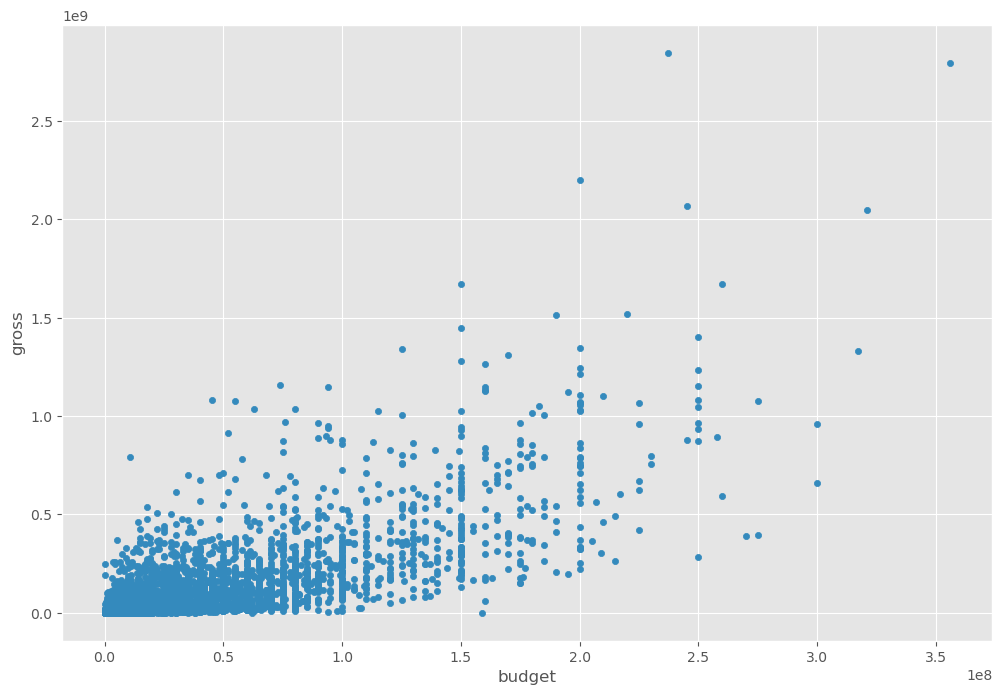

In [13]:
df.plot.scatter(x='budget', y='gross')
plt.show()

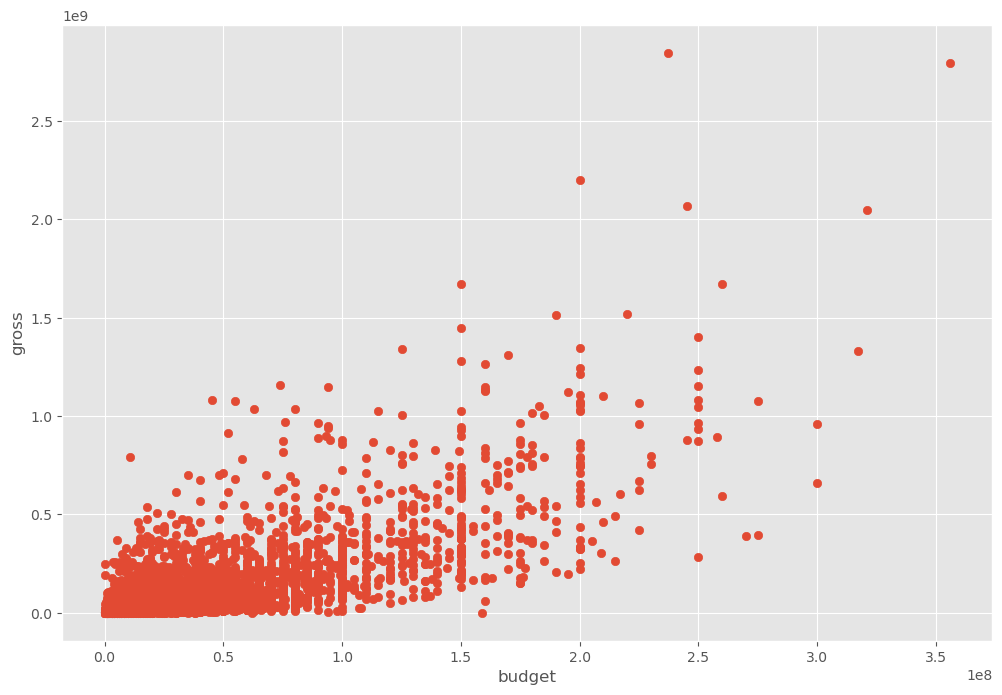

In [14]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

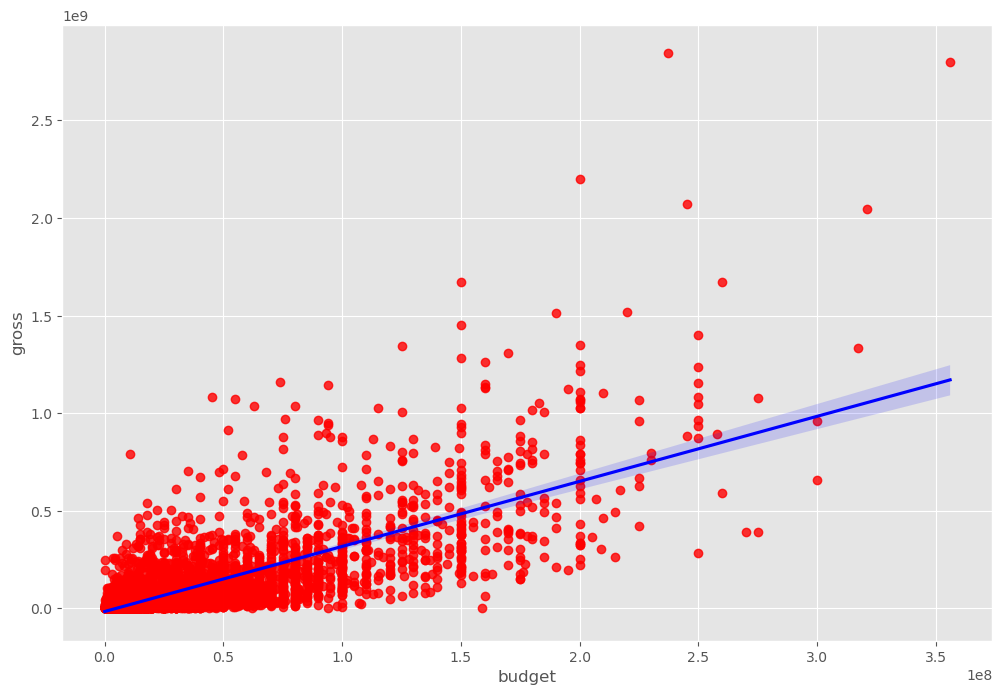

In [15]:
sns.regplot(x='budget', y='gross', data = df, scatter_kws = {'color': 'red'}, line_kws={'color' : 'blue'})

In [16]:
# let's start looking at correlation

In [17]:
df.corr() #pearson(default), kendall, spearman
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [18]:
# let's vizualise our matrix above

Text(120.72222222222221, 0.5, 'Movie Features')

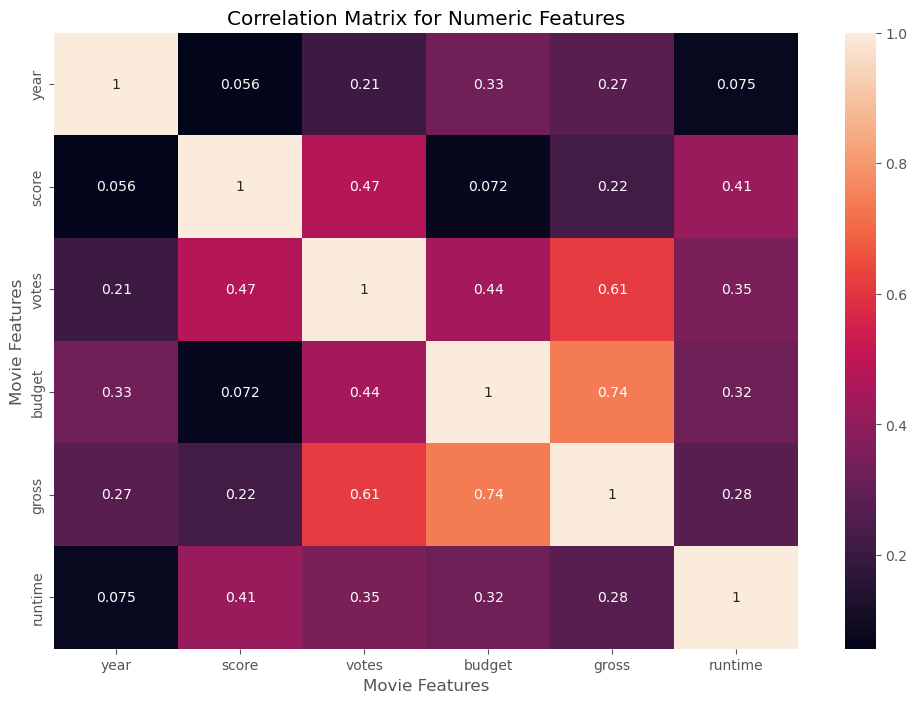

In [19]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

Text(120.72222222222221, 0.5, 'Movie Features')

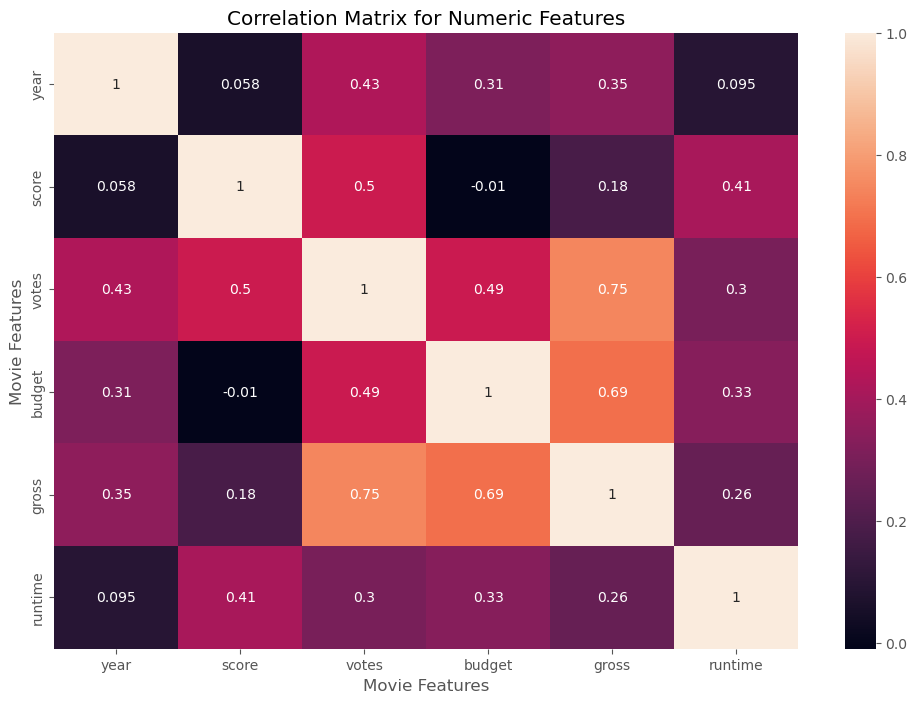

In [20]:
correlation_matrix = df.corr(method = 'spearman')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [21]:
# lets turn company type to interger

In [26]:
df.sort_values(by = 'gross', inplace = True, ascending = False)

In [27]:
data_numerized = df

for col_name in data_numerized.columns:
    if data_numerized[col_name].dtype == 'object':
        data_numerized[col_name] = data_numerized[col_name].astype('category')
        data_numerized[col_name] = data_numerized[col_name].cat.codes
        
data_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,0


In [28]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,0


Text(120.72222222222221, 0.5, 'Movies Features')

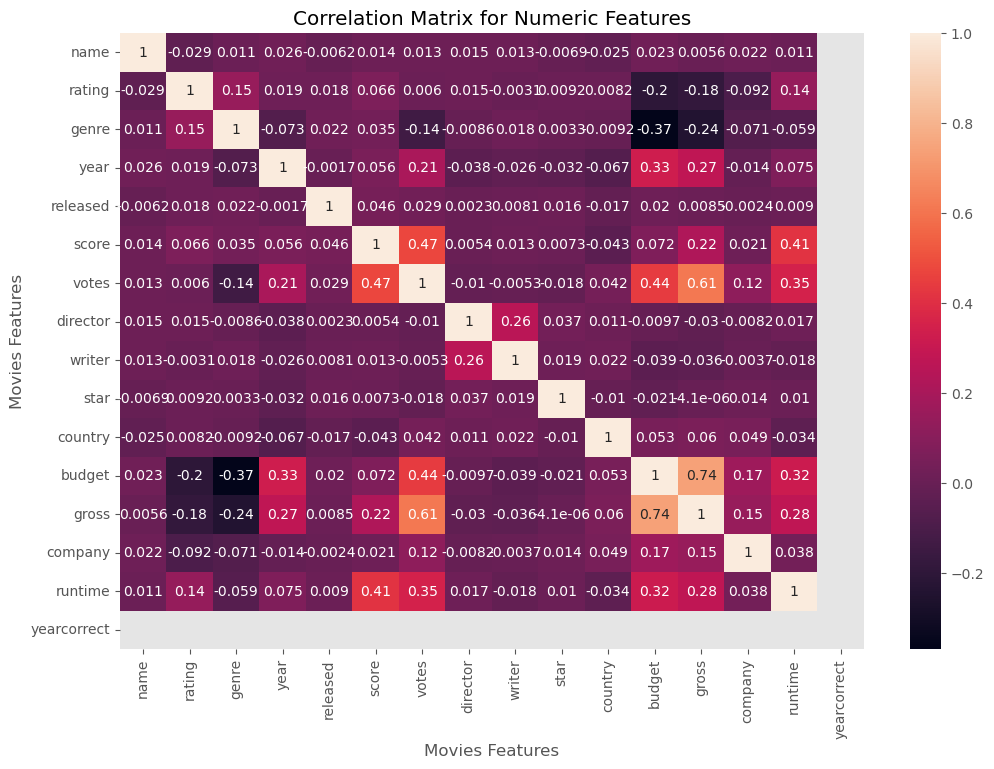

In [29]:
correlation_matrix = data_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')

In [30]:
pd.set_option('display.max_rows', None)
matrix_cor = data_numerized.corr()
matrix_pairs = matrix_cor.unstack()
matrix_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect         NaN
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [31]:
sort_matrix = matrix_pairs.sort_values()
sort_matrix

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
             gross         -0.181906
gross        rating        -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
company      rating        -0.092357
rating       company       -0.092357
genre        year          -0.073167
year         genre         -0.073167
genre        company       -0.071334
company      genre         -0.071334
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
director     year          -0.038354
year         director      -0.038354
writer       gross         -0.035885
g

In [32]:
matrix_sorted = sort_matrix.sort_values()
high_sortedMat = matrix_sorted[(matrix_sorted) > 0.5 ]
high_sortedMat

gross     votes       0.614751
votes     gross       0.614751
gross     budget      0.740247
budget    gross       0.740247
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
company   company     1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
gross     gross       1.000000
director  director    1.000000
name      name        1.000000
writer    writer      1.000000
runtime   runtime     1.000000
dtype: float64

In [25]:
# votes and budget have the highest correlation